Leeza Sergeeva
Homework 1
2/7/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from random import randint
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

1. Consider an experiment where you randomly pick 10 people and write down their birthdays. Let X be the random variable that is 0 when nobody shares a birthday and is 1 when at least two people share a birthday in your sample.

(a) Describe the sample space of this experiment.

Set of all possible 10 birthday dates.

(b) Simulate this experiment and use this simulation to estimate the probability distribution of random variable X. Use at least 10,000 trials.

Number of coinsidences  1180
Number of NO coinsidences  8820
{1: 1180, 0: 8820}


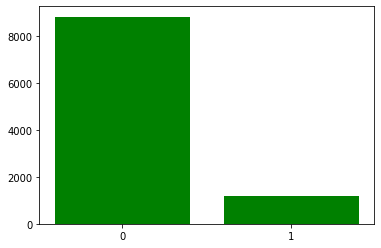

In [2]:
# random number between 0 and 1 for 10 people sharing a birthday 
# (between day 1 and day 365 of the year)

num_people = 10
max_dates_limit = 365
num_trials = 10000
num_coincidence = 0
num_no_coincidence = 0
num_of_trials = 0

for _ in range(num_trials):
    birthdays = []
    num_of_trials += 1
    for _ in range(num_people):
        random_birthday = randint(1, max_dates_limit)
        birthdays.append(random_birthday)
        unique_birthdays = set(birthdays)
        num_birthdays = len(birthdays)
        num_unique_birthdays = len(unique_birthdays)
        has_coincidence = (num_birthdays != num_unique_birthdays)
        if has_coincidence == True:
            num_coincidence += 1
            break

num_no_coincidence = num_of_trials - num_coincidence

value_dict = {1: num_coincidence, 0: num_no_coincidence}
print("Number of coinsidences ", num_coincidence)
print("Number of NO coinsidences ", num_no_coincidence)
print(value_dict)

plt.bar(list(value_dict.keys()), value_dict.values(), color='g')
plt.xticks(np.arange(0, 2.0, 1.0))
plt.show()

(c) What happens if I change my experiment to pick more people? Visualize this change using a few estimated probability distributions.

Vizualization for sample size of more than 10 people. Chosen sample size is 23.

Number of coinsidences  5147
Number of NO coinsidences  4853
{1: 5147, 0: 4853}


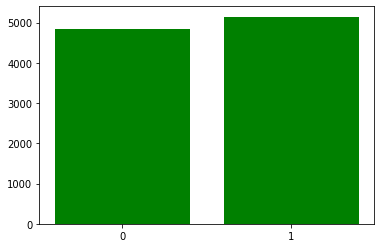

In [3]:
# random number between 0 and 1 for 23 people sharing a birthday 
# (between day 1 and day 365 of the year)

num_people = 23
max_dates_limit = 365
num_trials = 10000
num_coincidence = 0
num_no_coincidence = 0
num_of_trials = 0

for _ in range(num_trials):
    birthdays = []
    num_of_trials += 1
    for _ in range(num_people):
        random_birthday = randint(1, max_dates_limit)
        birthdays.append(random_birthday)
        unique_birthdays = set(birthdays)
        num_birthdays = len(birthdays)
        num_unique_birthdays = len(unique_birthdays)
        has_coincidence = (num_birthdays != num_unique_birthdays)
        if has_coincidence == True:
            num_coincidence += 1
            break

num_no_coincidence = num_of_trials - num_coincidence

value_dict = {1: num_coincidence, 0: num_no_coincidence}
print("Number of coinsidences ", num_coincidence)
print("Number of NO coinsidences ", num_no_coincidence)
print(value_dict)

plt.bar(list(value_dict.keys()), value_dict.values(), color='g')
plt.xticks(np.arange(0, 2.0, 1.0))
plt.show()


Vizualization for sample size of more than 10 people. Chosen sample size is 50.

Number of coinsidences  9716
Number of NO coinsidences  284
{1: 9716, 0: 284}


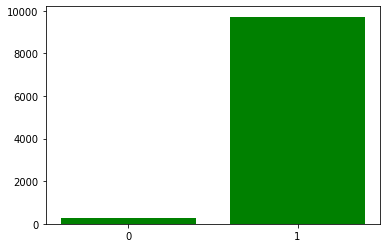

In [4]:
# random number between 0 and 1 for 50 people sharing a birthday 
# (between day 1 and day 365 of the year)

num_people = 50
max_dates_limit = 365
num_trials = 10000
num_coincidence = 0
num_no_coincidence = 0
num_of_trials = 0

for _ in range(num_trials):
    birthdays = []
    num_of_trials += 1
    for _ in range(num_people):
        random_birthday = randint(1, max_dates_limit)
        birthdays.append(random_birthday)
        unique_birthdays = set(birthdays)
        num_birthdays = len(birthdays)
        num_unique_birthdays = len(unique_birthdays)
        has_coincidence = (num_birthdays != num_unique_birthdays)
        if has_coincidence == True:
            num_coincidence += 1
            break

num_no_coincidence = num_of_trials - num_coincidence

value_dict = {1: num_coincidence, 0: num_no_coincidence}
print("Number of coinsidences ", num_coincidence)
print("Number of NO coinsidences ", num_no_coincidence)
print(value_dict)

plt.bar(list(value_dict.keys()), value_dict.values(), color='g')
plt.xticks(np.arange(0, 2.0, 1.0))
plt.show()

2. Consider the olympic athlete data from the January 31st lecture.

(a) Choose a country and set up a Hypothesis Test to decide whether a random sample of 100 athletes from that country have a mean weight different from the population mean.

In [5]:
# read in csv file
athlete_events_df = pd.read_csv('data/athlete_events.csv')

# get dataframe of Denmark athletes only
df_denmark = athlete_events_df[(athlete_events_df['NOC'] == 'DEN')]

# calucale mean for all Denmark athletes
pop_mean = df_denmark['Weight'].mean()

# sample 100 random athletes from the Denmark
df_sample = df_denmark.sample(n = 100)
sample_mean = df_sample['Weight'].mean()

print("Population mean weight of a chosen country: ", pop_mean)
print("Mean weight of random 100 athletes from a chosen country:", sample_mean)
print("Mean weight difference (sample - population):", sample_mean-pop_mean)

Population mean weight of a chosen country:  73.83750728013977
Mean weight of random 100 athletes from a chosen country: 75.19565217391305
Mean weight difference (sample - population): 1.3581448937732716


(b) Calculate the p-value to determine whether to reject or fail to reject the null hypothesis with a significance level of α = 0:01.

In [6]:
# calculate standard error for sample population height
std_error = scipy.stats.sem(df_sample['Weight'], nan_policy='omit')
print("Standard error of sample population is", std_error)
# this is the sampling distribution

Standard error of sample population is 2.016027462530865


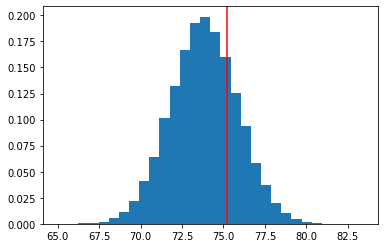

In [7]:
ndst = np.random.normal(pop_mean, std_error, 100000)

plt.hist(ndst, bins=30, density=True)

# vertical line
plt.axvline(x=sample_mean, color='red')
plt.show()

In [8]:
z = (sample_mean - pop_mean) / (std_error)
z

0.6736738060444346

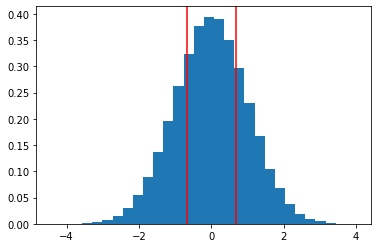

In [9]:
# this function gives the area under the standard normal distribution
# to the left of the z value given
def p_left_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)

ndst = np.random.normal(0, 1, 100000)
plt.hist(ndst, bins=30, density=True)

# In this plot we want the area to the left of left-most red line
# and the right of the right-most red line
plt.axvline(x=-z, color='red')
plt.axvline(x=z, color='red')
plt.show()

In [10]:
# since the distribution is symmetric we can just find
# 2 times the area left of the left-most red line
p = 2*p_left_of_z(-z)
p

0.50051871853871

In [11]:
# set up null Hypothesis rejection 
alpha = 0.01

# if  𝑝<𝛼  we reject the null hypothesis
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("The null hypothesis is true.")

The null hypothesis is true.


3. Import the Advertising dataset found on Canvas looking at dollars spent by businesses on advertising in various mediums along with the associated sales that quarter.

(a) What variables in this dataset appear linearly correlated? Pick a pair that look linearly correlated and calculate the R2 value for a line of best fit using OLS.

In [12]:
advertising_df = pd.read_csv('data/Advertising.csv')
advertising_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


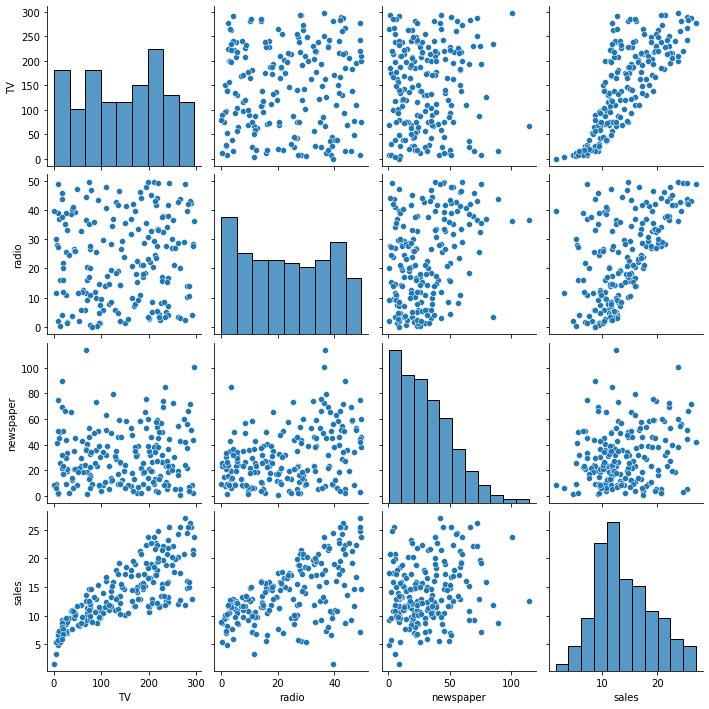

In [13]:
# make quick graph to find linear relations between two variables
sns.pairplot(advertising_df)

 Radio and Sales data appear linearly correlated.

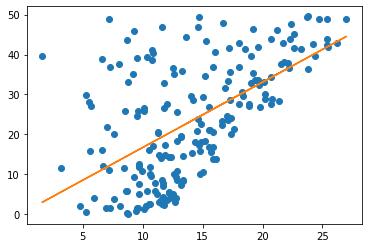

In [14]:
x=advertising_df['sales']
y=advertising_df['radio']

# m = slope, b = intercept
m, b = np.polyfit(x, y, 1)

# create scatter plot
plt.plot(x, y, 'o')
# create best fitting line
plt.plot(x, m*x + b)



In [15]:
model = ols(formula = 'sales ~ radio', data=advertising_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           4.35e-19
Time:                        23:39:48   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

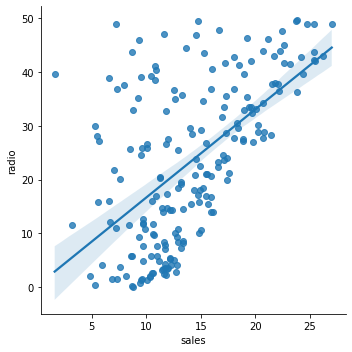

In [16]:
sns.lmplot(x='sales',y='radio',data=advertising_df)

(b) Explain in your own words what the relationship between these two variables using the line of best fit.

Since we have R-squared value of 0.332, it means that about 33% of the points corellates with the linear regression when we compare businesses spending money on newspaper advertisement and increase in the sales. The closer the R-squered value to 1, the better fit of chosen data for linear regrassion. This R-squere value shows that there is little corellation between spending money on advertisement in the newspapers and sales. Low positive corellation.

(a) Are they linearly correlated? Are they correlated in some other way?

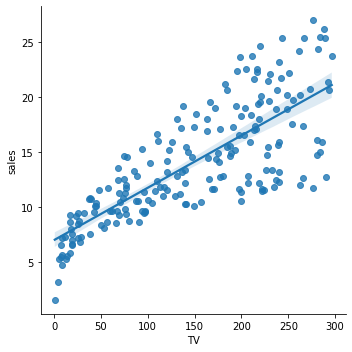

In [17]:
sns.lmplot(x='TV',y='sales',data=advertising_df)

In [18]:
# sales (Y) is dependable value, while TV (X) is independent predictor variable 
model = ols(formula = 'sales ~ TV', data=advertising_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        23:39:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TV and sales variables have positive correlation with the R-Squared value of 0.612. This means that about 61% of sales variance can be explained by the TV column using this line.

(b) How might we create (or engineer) a feature from the TV variable that was linearly correlated with sales?

We would look for the point closest to the linear regression line. We would choose the point with the R-squered value closest to 1.

5. Import the Penguins dataset we looked at in class on January 24th.

(a) Which other numerical variable predict bill length the best with a linear model? What is the R2 for each of these?

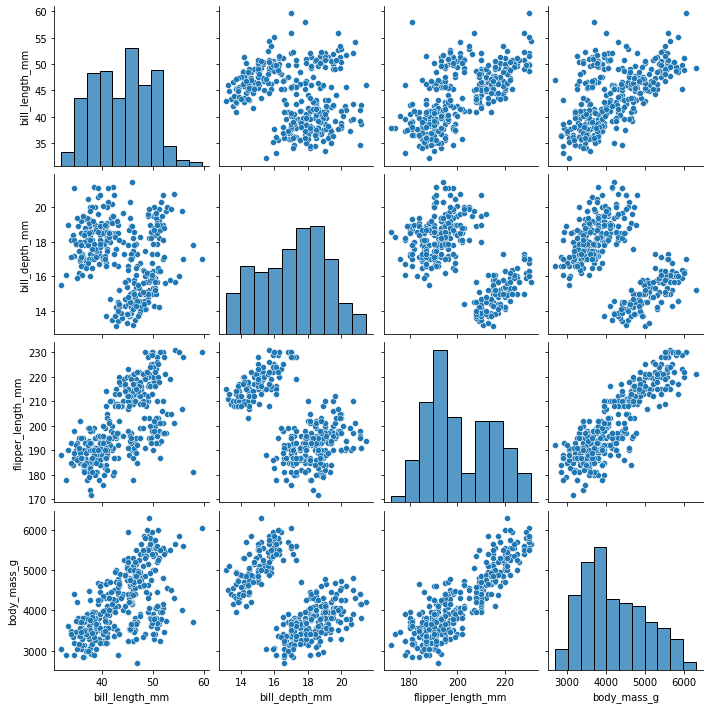

In [19]:
penguins_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

# make quick graph to find linear relations between two variables
sns.pairplot(penguins_df)

It looks like flipper length and body mass variables can predict bill length the best with a linear model. 

In [20]:
# bill_length_mm (Y) is dependable value, while flipper_length_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=penguins_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     257.1
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.74e-43
Time:                        23:39:50   Log-Likelihood:                -968.98
No. Observations:                 342   AIC:                             1942.
Df Residuals:                     340   BIC:                             1950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.2649      3.200     -2.270      0.024     -13.559      -0.970
flipper_length_mm     0.2548      0.016     16.034      0.000       0.224       0.286
==============================================================================
Omnibus:                       37.347   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.503
Skew:                           0.791   Prob(JB):                     2.94e-11
Kurtosis:                       3.948   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 5787.763384481191 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [22]:
# bill_length_mm (Y) is dependable value, while body_mass_g (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ body_mass_g', data=penguins_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     186.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           3.81e-34
Time:                        23:39:50   Log-Likelihood:                -990.52
No. Observations:                 342   AIC:                             1985.
Df Residuals:                     340   BIC:                             1993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.8989      1.269     21.194      0.000      24.403      29.395
body_mass_g     0.0041      0.000     13.654      0.000       0.003       0.005
==============================================================================
Omnibus:                       29.171   Durbin-Watson:                   0.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.247
Skew:                           0.762   Prob(JB):                     3.66e-08
Kurtosis:                       3.280   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 6564.494171261718 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [24]:
# bill_length_mm (Y) is dependable value, while bill_depth_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=penguins_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     19.88
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.12e-05
Time:                        23:39:50   Log-Likelihood:                -1055.6
No. Observations:                 342   AIC:                             2115.
Df Residuals:                     340   BIC:                             2123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        55.0674      2.516     21.887      0.000      50.119      60.016
bill_depth_mm    -0.6498      0.146     -4.459      0.000      -0.936      -0.363
==============================================================================
Omnibus:                        8.831   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.238
Skew:                           0.269   Prob(JB):                       0.0268
Kurtosis:                       2.532   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 9602.63467668811 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


R-squered value for flipper_length_mm is 0.431.
R-squered value for body_mass_g is 0.354.
flipper_length_mm value has stronger positive correlation with the bill_length_mm than the body_mass_g.

(b) What if we create a separate linear model for each species to predict bill length? Does the overall effectiveness of our model improve? Use R2 values to make your decision.

In [26]:
# show unique species in the dataframe
penguins_df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [27]:
# create dataframe for Adelie penguins only
adelie_df = penguins_df[penguins_df["species"] == 'Adelie']

# bill_length_mm (Y) is dependable value, while flipper_length_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=adelie_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     17.69
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           4.47e-05
Time:                        23:39:50   Log-Likelihood:                -353.21
No. Observations:                 151   AIC:                             710.4
Df Residuals:                     149   BIC:                             716.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.5871      5.996      2.266      0.025       1.740      25.435
flipper_length_mm     0.1327      0.032      4.206      0.000       0.070       0.195
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.604
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.319
Skew:                          -0.027   Prob(JB):                        0.852
Kurtosis:                       2.781   Cond. No.                     5.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 951.1242021296365 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [29]:
# bill_length_mm (Y) is dependable value, while flipper_length_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ body_mass_g', data=adelie_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     64.24
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           2.95e-13
Time:                        23:39:50   Log-Likelihood:                -334.61
No. Observations:                 151   AIC:                             673.2
Df Residuals:                     149   BIC:                             679.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.9941      1.483     18.201      0.000      24.064      29.925
body_mass_g     0.0032      0.000      8.015      0.000       0.002       0.004
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.185
Skew:                          -0.078   Prob(JB):                        0.912
Kurtosis:                       2.927   Cond. No.                     3.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 743.5071832397019 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [31]:
# bill_length_mm (Y) is dependable value, while bill_depth_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=adelie_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     26.97
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           6.67e-07
Time:                        23:39:50   Log-Likelihood:                -349.12
No. Observations:                 151   AIC:                             702.2
Df Residuals:                     149   BIC:                             708.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.0681      3.034      7.603      0.000      17.072      29.064
bill_depth_mm     0.8570      0.165      5.193      0.000       0.531       1.183
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   2.428
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.714
Skew:                           0.004   Prob(JB):                        0.700
Kurtosis:                       2.663   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 900.9750422610072 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [33]:
# create dataframe for Adelie penguins only
chinstrap_df = penguins_df[penguins_df["species"] == 'Chinstrap']

# bill_length_mm (Y) is dependable value, while flipper_length_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=chinstrap_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     18.88
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           4.92e-05
Time:                        23:39:50   Log-Likelihood:                -169.42
No. Observations:                  68   AIC:                             342.8
Df Residuals:                      66   BIC:                             347.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.5934      9.959      0.562      0.576     -14.289      25.476
flipper_length_mm     0.2208      0.051      4.345      0.000       0.119       0.322
==============================================================================
Omnibus:                       18.050   Durbin-Watson:                   2.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.168
Skew:                           0.816   Prob(JB):                     5.15e-09
Kurtosis:                       6.288   Cond. No.                     5.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 580.9288691441985 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [35]:
# bill_length_mm (Y) is dependable value, while flipper_length_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ body_mass_g', data=chinstrap_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     23.65
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           7.48e-06
Time:                        23:39:50   Log-Likelihood:                -167.56
No. Observations:                  68   AIC:                             339.1
Df Residuals:                      66   BIC:                             343.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.1742      3.443      9.344      0.000      25.299      39.049
body_mass_g     0.0045      0.001      4.863      0.000       0.003       0.006
==============================================================================
Omnibus:                        2.589   Durbin-Watson:                   2.701
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.795
Skew:                           0.333   Prob(JB):                        0.408
Kurtosis:                       3.435   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 549.9910884198325 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [37]:
# bill_length_mm (Y) is dependable value, while bill_depth_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=chinstrap_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     49.21
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.53e-09
Time:                        23:39:50   Log-Likelihood:                -159.03
No. Observations:                  68   AIC:                             322.1
Df Residuals:                      66   BIC:                             326.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.4279      5.057      2.655      0.010       3.332      23.524
bill_depth_mm     1.9221      0.274      7.015      0.000       1.375       2.469
==============================================================================
Omnibus:                       14.567   Durbin-Watson:                   2.553
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.201
Skew:                           0.682   Prob(JB):                     1.24e-06
Kurtosis:                       5.782   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 428.0019710415375 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [39]:
# create dataframe for Adelie penguins only
gentoo_df = penguins_df[penguins_df["species"] == 'Gentoo']

# bill_length_mm (Y) is dependable value, while flipper_length_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=gentoo_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     93.97
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           8.60e-17
Time:                        23:39:50   Log-Likelihood:                -277.12
No. Observations:                 123   AIC:                             558.2
Df Residuals:                     121   BIC:                             563.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -20.7362      7.043     -2.944      0.004     -34.679      -6.793
flipper_length_mm     0.3142      0.032      9.694      0.000       0.250       0.378
==============================================================================
Omnibus:                        4.695   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.237
Skew:                           0.349   Prob(JB):                        0.120
Kurtosis:                       3.582   Cond. No.                     7.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 652.2121345765013 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [41]:
# bill_length_mm (Y) is dependable value, while flipper_length_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ body_mass_g', data=gentoo_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     98.12
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           2.68e-17
Time:                        23:39:50   Log-Likelihood:                -275.95
No. Observations:                 123   AIC:                             555.9
Df Residuals:                     121   BIC:                             561.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.7395      2.107     12.693      0.000      22.569      30.910
body_mass_g     0.0041      0.000      9.905      0.000       0.003       0.005
==============================================================================
Omnibus:                        5.430   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.258
Skew:                           0.354   Prob(JB):                       0.0722
Kurtosis:                       3.724   Cond. No.                     5.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 639.8738978595248 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


In [43]:
# bill_length_mm (Y) is dependable value, while bill_depth_mm (X) is independent predictor variable 
model = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=gentoo_df)

# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     85.46
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.02e-15
Time:                        23:39:50   Log-Likelihood:                -279.61
No. Observations:                 123   AIC:                             563.2
Df Residuals:                     121   BIC:                             568.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.2295      3.282      5.250      0.000      10.732      23.727
bill_depth_mm     2.0208      0.219      9.245      0.000       1.588       2.454
==============================================================================
Omnibus:                        5.414   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                7.859
Skew:                           0.089   Prob(JB):                       0.0196
Kurtosis:                       4.225   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print("Residual Sum of Squares =",res.ssr,"The smaller the 𝑅𝑆𝑆 value, the better fit the model is.")

Residual Sum of Squares = 679.0860856983069 The smaller the 𝑅𝑆𝑆 value, the better fit the model is.


# For all penguins bill_length_mm

* body_mass_g R-Squered: 0.354		RSS = 6564.49

* flipper_length_mm R-Squered: 0.431	RSS = 5787.76

* bill_depth_mm R-Squered: 0.055		RSS = 9602.63


# For Adelie penguins bill_length_mm

* body_mass_g R-Squered: 0.301		RSS = 743.50

* flipper_length_mm R-Squered: 0.106	RSS = 951.12

* bill_depth_mm R-Squered: 0.153		RSS = 900.97


# For Chinstrap penguins bill_length_mm

* body_mass_g R-Squered: 0.264		RSS = 549.99

* flipper_length_mm R-Squered: 0.222	RSS = 580.92

* bill_depth_mm R-Squered: 0.427		RSS = 428.00


# For Gentoo penguins bill_length_mm

* body_mass_g R-Squered: 0.448		RSS = 639.87

* flipper_length_mm R-Squered: 0.437	RSS = 652.21

* bill_depth_mm R-Squered: 0.414		RSS = 679.08

After comparing different R-squered values for all three species separately, we can see that for some species there is strong positive correlation between values and the bill length compared to overall population R-squered values. Adelie penguins have a stronger positive corellation between body mass and bill length. Chinstrap penguins have strong positive corellation between bill depth and bill length. And Gentoo penguins have strong positive corellations of all three variable related to bill length. Chinstrap species show that the points have the least amount of distance from the best fitting line. 

(c) Why might models get better if we create a separate linear model for each category? Can a model get "worse" if we do this?

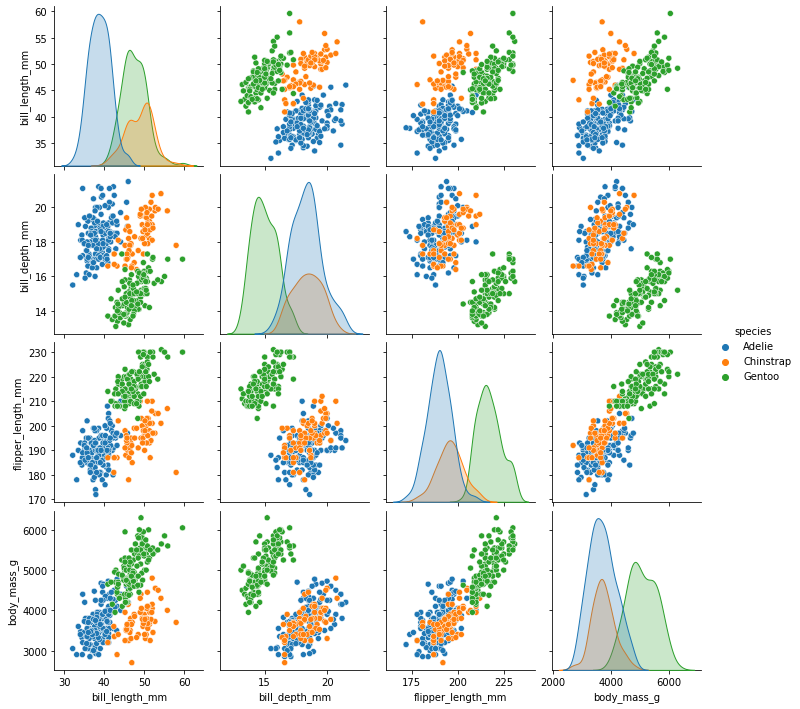

In [45]:
# Comparison plot based on the three species of the penguins
sns.pairplot(penguins_df, hue="species")

# For all penguins bill_length_mm

* body_mass_g R-Squered: 0.354		RSS = 6564.49

* flipper_length_mm R-Squered: 0.431	RSS = 5787.76

* bill_depth_mm R-Squered: 0.055		RSS = 9602.63


# For Adelie penguins bill_length_mm

* body_mass_g R-Squered: 0.301		RSS = 743.50

* flipper_length_mm R-Squered: 0.106	RSS = 951.12

* bill_depth_mm R-Squered: 0.153		RSS = 900.97


# For Chinstrap penguins bill_length_mm

* body_mass_g R-Squered: 0.264		RSS = 549.99

* flipper_length_mm R-Squered: 0.222	RSS = 580.92

* bill_depth_mm R-Squered: 0.427		RSS = 428.00


# For Gentoo penguins bill_length_mm

* body_mass_g R-Squered: 0.448		RSS = 639.87

* flipper_length_mm R-Squered: 0.437	RSS = 652.21

* bill_depth_mm R-Squered: 0.414		RSS = 679.08


From the data above we can see that the model became better fit to liner regressions when we split data by species and compared how different values correlate with bill length. Splitting data into thre groups based on different species reduced the Residual Sum of Squares (RSS). 

Model can get "worse" if we create a separate linear model for each category, where the categories RSS values are larger than the RSS values of the whole population. This will signify that the points have very high distances from the regression line, decreasing the correlation likelihood. 